### Cartoonify Using K-means Clustering

Below, we have implemented K-means clustering algorithm using efficienct numpy matrix operations. We use it to get the effect of cartoonified images. We apply to several examples for fun!

K-means Clustering Algorithm we used is very simply described as follows:

1. For each prototype RGB values, find all the points (with vector defined by RGB value) that are closest to it as compared to any other point. 

2. We take the mean of all such points and update the prototype by that mean. 

3. We defined a 'change measure' give by the sum of norm of the difference between old prototypes and the updated prototypes. We halt the algorithm when this change measure is suffieciently low.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
import math
import numpy.linalg as linalg
%matplotlib inline

In [2]:
im = mplimg.imread("nature.jpg")
print im.shape
print(type(im[0, 0, 0]))

(1600, 2560, 3)
<type 'numpy.uint8'>


In [3]:
def closest(prototypes, im):
    k = len(prototypes)
    pixels = im.shape[0]*im.shape[1]
    lin_proto = np.reshape(prototypes, 3*k)
    lin_im = np.reshape(np.stack([im for _ in range(k)], axis=2), (pixels, 3*k))
    before_norm = np.reshape(lin_im-lin_proto, (pixels, k, 3))
    after_norm = linalg.norm(before_norm, axis=2)
    return np.reshape(np.argmin(after_norm, axis=1), (im.shape[0], im.shape[1]))

In [4]:
def update_prototypes(prototypes, im):
    k = len(prototypes)
    protos_index = closest(prototypes, im)
    prototypes_count = np.zeros(k)
    prototypes_sum = np.zeros((k, 3))
    for i in xrange(im.shape[0]):
        for j in xrange(im.shape[1]):
            closest_prototype = protos_index[i, j]
            prototypes_count[closest_prototype] += 1
            prototypes_sum[closest_prototype] += im[i, j]
    new_prototypes = prototypes_sum
    # print "Prototypes Count:", prototypes_count
    for i in range(len(prototypes)):
        if prototypes_count[i] != 0: new_prototypes[i] /= prototypes_count[i]
    # print new_prototypes
    return new_prototypes

# print update_prototypes(prototypes, im)

In [5]:
def k_means_clustering(k, itr, im):
    prototypes = np.random.randint(256, size=(k, 3))
    for i in range(itr):
        print "Iteration:", i+1 
        new_prototypes = update_prototypes(prototypes, im)
        print "Change measure:", linalg.norm(new_prototypes-prototypes)
        prototypes = new_prototypes
    print prototypes
    new_im = np.zeros(im.shape)
    protos_index = closest(prototypes, im) 
    new_im = np.uint8(prototypes[protos_index])
    plt.figure(figsize = (10,10))
    plt.imshow(im)
    plt.show()
    plt.figure(figsize = (10,10))
    plt.imshow(new_im)
    plt.show()

##### Before Training With 3 Prototypes (Note: Random Initialization of Prototypes)

[[ 26 215  47]
 [155 162 248]
 [179  93 112]]


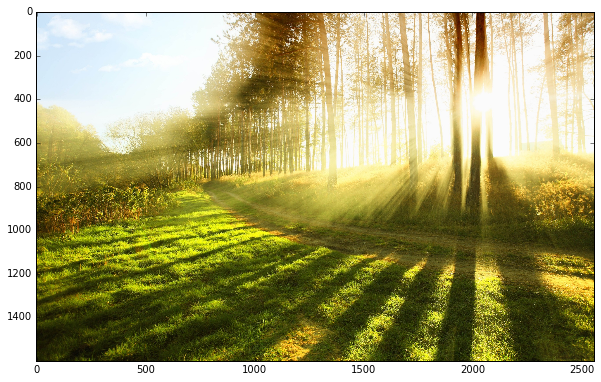

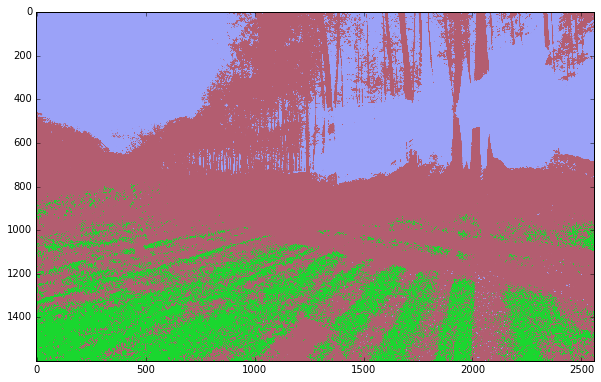

In [6]:
k_means_clustering(3, 0, im)

##### 3 Colors, 5 Iteration

Iteration: 1
Change measure: 239.683242991
Iteration: 2
Change measure: 59.9349619645
Iteration: 3
Change measure: 32.5949080393
Iteration: 4
Change measure: 25.2625459627
Iteration: 5
Change measure: 19.2925498217


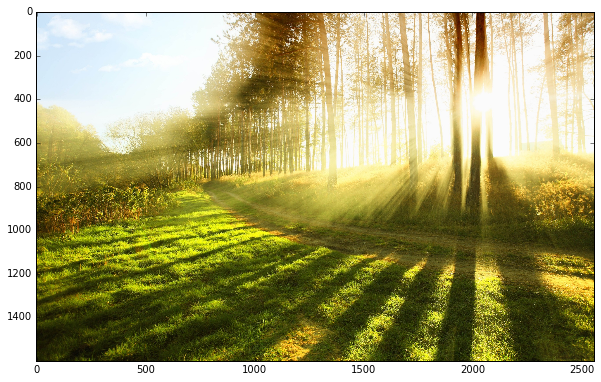

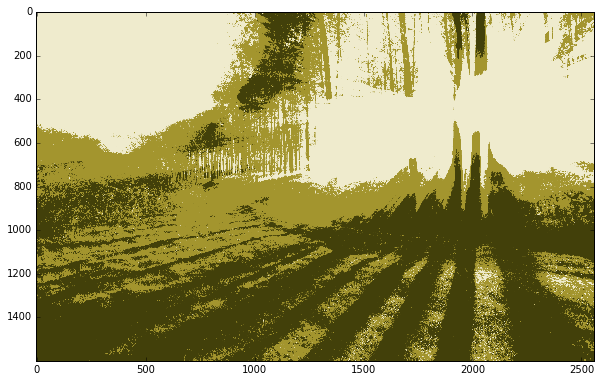

In [7]:
k_means_clustering(3, 5, im)

##### 10 Colors, 5 Iterations

Iteration: 1
Change measure: 500.533428066
Iteration: 2
Change measure: 61.3856693146
Iteration: 3
Change measure: 32.3303039703
Iteration: 4
Change measure: 21.7908193308
Iteration: 5
Change measure: 19.332469906
[[  44.58772312   47.20897506    5.59812757]
 [ 225.376988    205.8254807   118.96126253]
 [ 242.68982967  244.04699463  233.08651917]
 [ 182.5828776   179.3702479    26.3034596 ]
 [  72.60780924   70.63062386   11.56648407]
 [  26.03855744   27.11654774    2.86122238]
 [  11.38788871   12.08510638    1.95253682]
 [ 165.24193434  146.17248635   57.87653589]
 [   0.            0.            0.        ]
 [ 115.04199272  105.50575784   20.93820797]]


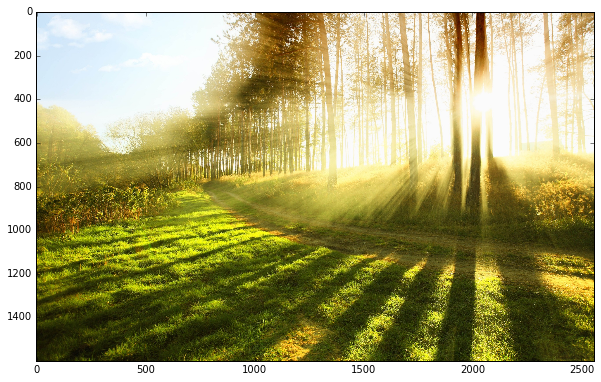

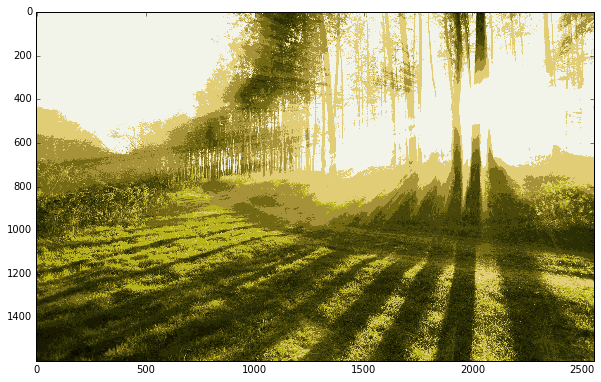

In [7]:
k_means_clustering(10, 5, im)

##### Human Face, 20 Colors, 10 Iterations

Iteration: 1
Change measure: 948.322338375
Iteration: 2
Change measure: 67.7175300753
Iteration: 3
Change measure: 21.0865645791
Iteration: 4
Change measure: 18.1714410847
Iteration: 5
Change measure: 17.917974685
Iteration: 6
Change measure: 14.8962218576
Iteration: 7
Change measure: 11.1190589025
Iteration: 8
Change measure: 16.9629825192
Iteration: 9
Change measure: 14.8937301834
Iteration: 10
Change measure: 13.2290534692
[[ 148.6726552   103.88478998   82.92647529]
 [  47.05609627   42.90631747   43.89449655]
 [ 210.43414756  213.39430491  214.34084617]
 [ 129.69266585  126.02758621  131.8648696 ]
 [  33.40533692   30.77005305   31.92841872]
 [  23.03662478   22.0567325    23.84955117]
 [  65.80238036   60.67468386   62.82596358]
 [  33.25         13.78571429    8.03571429]
 [  92.35979013   87.0559402    91.1028006 ]
 [   0.            0.            0.        ]
 [   0.            0.            0.        ]
 [   0.            0.            0.        ]
 [ 184.09495307  141.26843287 

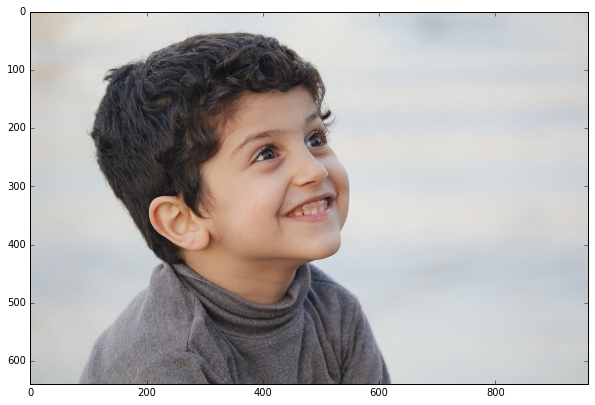

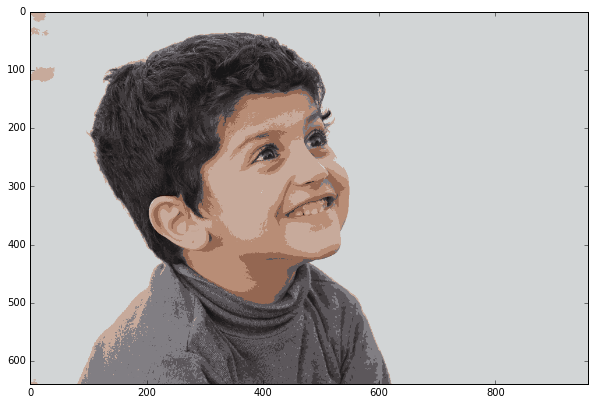

In [8]:
im2 = mplimg.imread("kid.jpg")
k_means_clustering(20, 10, im2)